
# Figures for the project writeup

This notebook includes the code that generates the figures in the project writeup. My matplotlib skills are not particularly good. Someday I'll fix that.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

def _read(name):
    return pd.read_csv(f"fig_data/{name}.csv").drop(columns=["Wall time"])


def _plot(d, *args, **kwargs):
    plt.plot(d["Step"], d["Value"], *args, **kwargs)

# Additional data to collect

This data is important to collect, because it forms key parts of the results section. Figure out a good way to run sequential multi-jobs (I don't understand this aspect of hydra) -- probably just do it as a shell script.

[X] Rerun the baseline (unmodified model) to get FER and AER (150 epochs)

[X] Rerun the baseline with wavelet transforms to get FER and AER (150 epochs)

[X] Rerun the baseline with wavelet transforms + log scaling to get FER and AER (150 epochs)

(Should be done by Monday morning)

[X] Rerun the TDSConvLSTMCTCModule, no wavelets (150 epochs)

[ ] Rerun the TDSConvLSTMCTCModule, wavelets no log scaling (150 epochs)

[X] Rerun the BandedLSTMModule (no wavelets) (100 epochs)

[X] Rerun the Conv2DBandedLSTMModule (no wavelets) (100 epochs)

(Should be done before Tuesday night)

# LSTM figures

[ ] Generate plot of loss for the non-functional LSTM networks (banded and conv2d-banded).

[ ] Generate plot of CER, DER, IER, SER for the non-functional LSTM networks (banded and conv2d-banded).

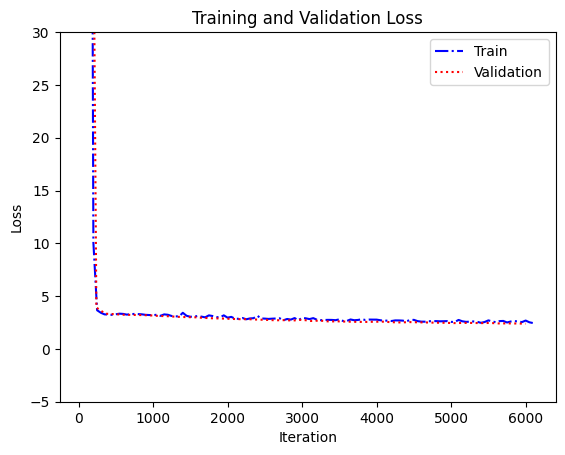

In [4]:
train_loss = _read("train-loss-bad-lstm")
val_loss = _read("val-loss-bad-lstm")

_plot(train_loss, color="blue", linestyle="-.")
_plot(val_loss, color="red", linestyle=':')
plt.ylim([-5, 30])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend(['Train', 'Validation'], loc='upper right')
plt.title("Training and Validation Loss")
plt.show()


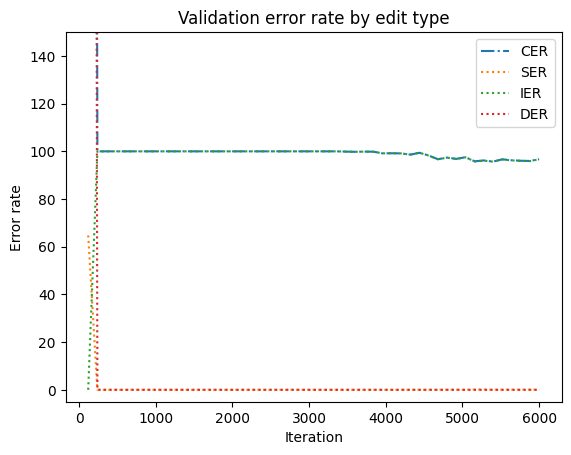

In [3]:
val_cer = _read("val-cer-bad-lstm")
val_ier = _read("val-ier-bad-lstm")
val_der = _read("val-der-bad-lstm")
val_ser = _read("val-ser-bad-lstm")

_plot(val_cer, linestyle='-.')
_plot(val_ser, linestyle=':')
_plot(val_ier, linestyle=':')
_plot(val_der, linestyle=':')
plt.xlabel("Iteration")
plt.ylabel("Error rate")
plt.ylim([-5, 150])
plt.legend(['CER', 'SER', 'IER', 'DER'], loc='upper right')
plt.title("Validation error rate by edit type")
plt.show()

# Baseline performance

[ ] Generate a plot of CER of the baseline with and without wavelet transforms, plus the log normalized wavelet transform

[ ] Generate a plot of the FER of the baseline with and without wavelet transforms, plus the log normalized wavelet transform



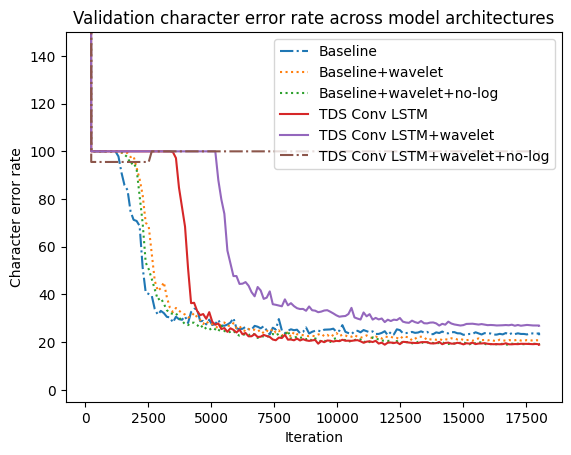

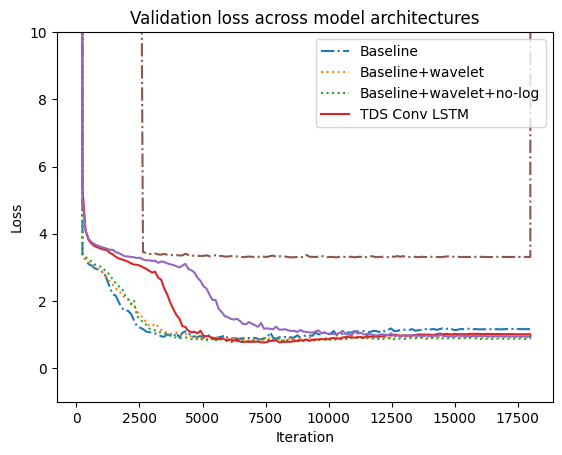

In [ ]:
val_cer_baseline_spec = _read('val-cer-baseline-spectrogram')
val_cer_baseline_wavelets = _read('val-cer-baseline-wavelets')
val_cer_baseline_wavelets_no_log = _read('val-cer-baseline-wavelets-no-log')
val_cer_lstm_spec = _read('val-cer-good-lstm-spectrogram')
val_cer_lstm_wavelets = _read('val-cer-good-lstm-wavelets')
val_cer_lstm_wavelets_no_log = _read('val-cer-good-lstm-wavelets-no-log')

_plot(val_cer_baseline_spec, linestyle='-.')
_plot(val_cer_baseline_wavelets, linestyle=':')
_plot(val_cer_baseline_wavelets_no_log, linestyle=':')
_plot(val_cer_lstm_spec, linestyle='-')
_plot(val_cer_lstm_wavelets, linestyle='-')
_plot(val_cer_lstm_wavelets_no_log, linestyle='-.')

plt.xlabel("Iteration")
plt.ylabel("Character error rate")
plt.ylim([-5, 150])
plt.legend(['Baseline', 'Baseline+wavelet', 'Baseline+wavelet+no-log', 'TDS Conv LSTM', 'TDS Conv LSTM+wavelet', 'TDS Conv LSTM+wavelet+no-log'], loc='upper right')
plt.title("Validation character error rate across model architectures")
plt.show()

val_loss_baseline_spec = _read('val-loss-baseline-spectrogram')
val_loss_baseline_wavelets = _read('val-loss-baseline-wavelets')
val_loss_baseline_wavelets_no_log = _read('val-loss-baseline-wavelets-no-log')
val_loss_lstm_spec = _read('val-loss-good-lstm-spectrogram')
val_loss_lstm_wavelets = _read('val-loss-good-lstm-wavelets')
val_loss_lstm_wavelets_no_log = _read('val-loss-good-lstm-wavelets-no-log')

_plot(val_loss_baseline_spec, linestyle='-.')
_plot(val_loss_baseline_wavelets, linestyle=':')
_plot(val_loss_baseline_wavelets_no_log, linestyle=':')
_plot(val_loss_lstm_spec, linestyle='-')
_plot(val_loss_lstm_wavelets, linestyle='-')
_plot(val_loss_lstm_wavelets_no_log, linestyle='-.')

plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.ylim([-1, 10])
plt.legend(['Baseline', 'Baseline+wavelet', 'Baseline+wavelet+no-log', 'TDS Conv LSTM', 'TDS Conv LSTM+wavelet', 'TDS Conv LSTM+wavelet+no-log'], loc='upper right')
plt.title("Validation loss across model architectures")
plt.show()

# Comparison of finger error rate to sub error rate for baseline and lstm



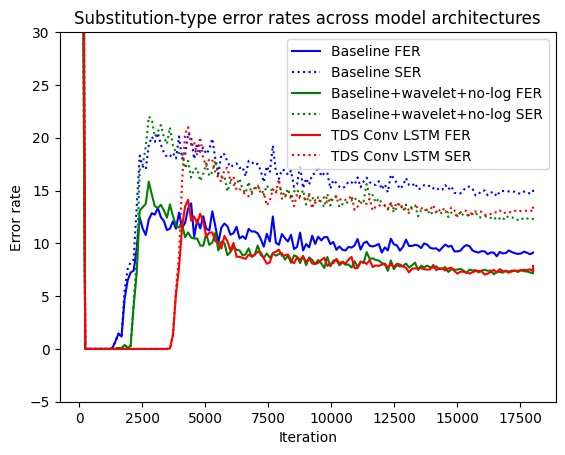

In [15]:
val_fer_baseline_spec = _read('val-fer-baseline-spectrogram')
val_fer_baseline_wavelets_no_log = _read('val-fer-baseline-wavelets-no-log')
val_fer_lstm_spec = _read('val-fer-good-lstm-spectrogram')

val_ser_baseline_spec = _read('val-ser-baseline-spectrogram')
val_ser_baseline_wavelets_no_log = _read('val-ser-baseline-wavelets-no-log')
val_ser_lstm_spec = _read('val-ser-good-lstm-spectrogram')

_plot(val_fer_baseline_spec, linestyle='-', color='blue')
_plot(val_ser_baseline_spec, linestyle=':', color='blue')

_plot(val_fer_baseline_wavelets_no_log, linestyle='-', color='green')
_plot(val_ser_baseline_wavelets_no_log, linestyle=':', color='green')

_plot(val_fer_lstm_spec, linestyle='-', color='red')
_plot(val_ser_lstm_spec, linestyle=':', color='red')

plt.xlabel("Iteration")
plt.ylabel("Error rate")
plt.ylim([-5, 30])
plt.legend(['Baseline FER', 'Baseline SER', 'Baseline+wavelet+no-log FER', 'Baseline+wavelet+no-log SER', 'TDS Conv LSTM FER', 'TDS Conv LSTM SER'], loc='upper right')
plt.title("Substitution-type error rates across model architectures")
plt.show()

# TDS Conv LSTM performance

[ ] Generate a plot of CER of the banded LSTM with and without wavelet transforms

[ ] Generate a plot of the FER of the banded LSTM with and without wavelet transforms
